In [241]:
# !pip install discopy
# !pip install pytket
# !pip install qiskit
#! pip install cirq

     |████████████████████████████████| 162 kB 24.0 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=897bb6aaf6bd6d2f1b40f271d1fc730e032bc04babbb483a3362471b5007c5d7
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [184]:
from discopy import Ob, Ty

egg, white, yolk = Ty('egg'), Ty('white'), Ty('yolk')

assert egg.objects == [Ob('egg')]
assert white @ yolk == Ty(Ob('white'), Ob('yolk'))

assert egg @ Ty() == egg == Ty() @ egg
assert egg @ (white @ yolk) == (egg @ white) @ yolk

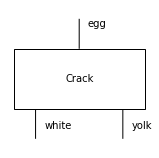

In [185]:
from discopy import Box

crack = Box('Crack', dom=egg, cod=white @ yolk)

crack.draw(figsize=(2, 2))

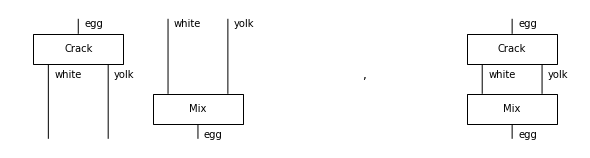

In [186]:
from discopy import drawing

mix = Box('Mix', white @ yolk, egg)

crack_tensor_mix = crack @ mix
crack_then_mix = crack >> mix

drawing.equation(crack_tensor_mix, crack_then_mix, space=2, symbol=', ', figsize=(8, 2))

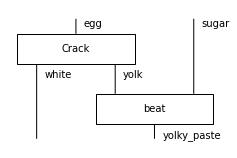

In [187]:
from discopy import Id

assert crack >> Id(white @ yolk) == crack == Id(egg) >> crack
assert crack @ Id(Ty()) == crack == Id(Ty()) @ crack

sugar, yolky_paste = Ty('sugar'), Ty('yolky_paste')
beat = Box('beat', yolk @ sugar, yolky_paste)

crack_then_beat = crack @ Id(sugar) >> Id(white) @ beat

crack_then_beat.draw(figsize=(3, 2))

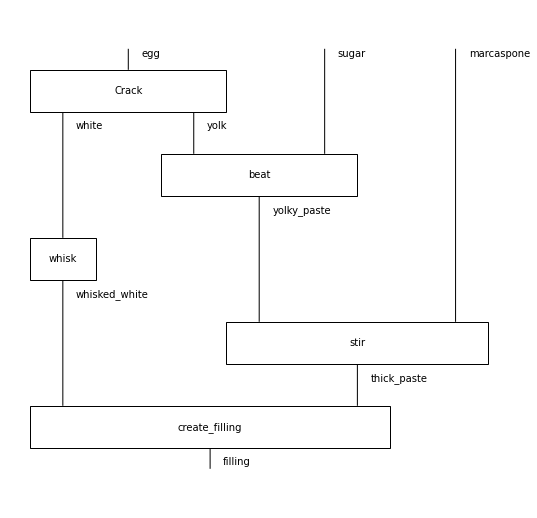

In [188]:
white, whisked_whites = Ty('white'), Ty('whisked_white')
cream, thick_paste = Ty('marcaspone'), Ty('thick_paste')
creama = Ty('filling')

whisk = Box('whisk', white, whisked_whites)

stir = Box('stir', yolky_paste @ cream, thick_paste)

create_filling = Box('create_filling', whisked_whites @ thick_paste, creama)


step_1 = crack @ Id(sugar) @ Id(cream)
step_2 = Id(white) @ beat  @ Id(cream)
step_3 = step_1 >> step_2 
step_4 =  step_3  >>  whisk @ Id(yolky_paste) @ Id(cream)
step_5 = step_4 >> Id(whisked_whites) @ stir 
step_6 = step_5 >> create_filling


step_6.draw(figsize=(7, 7))

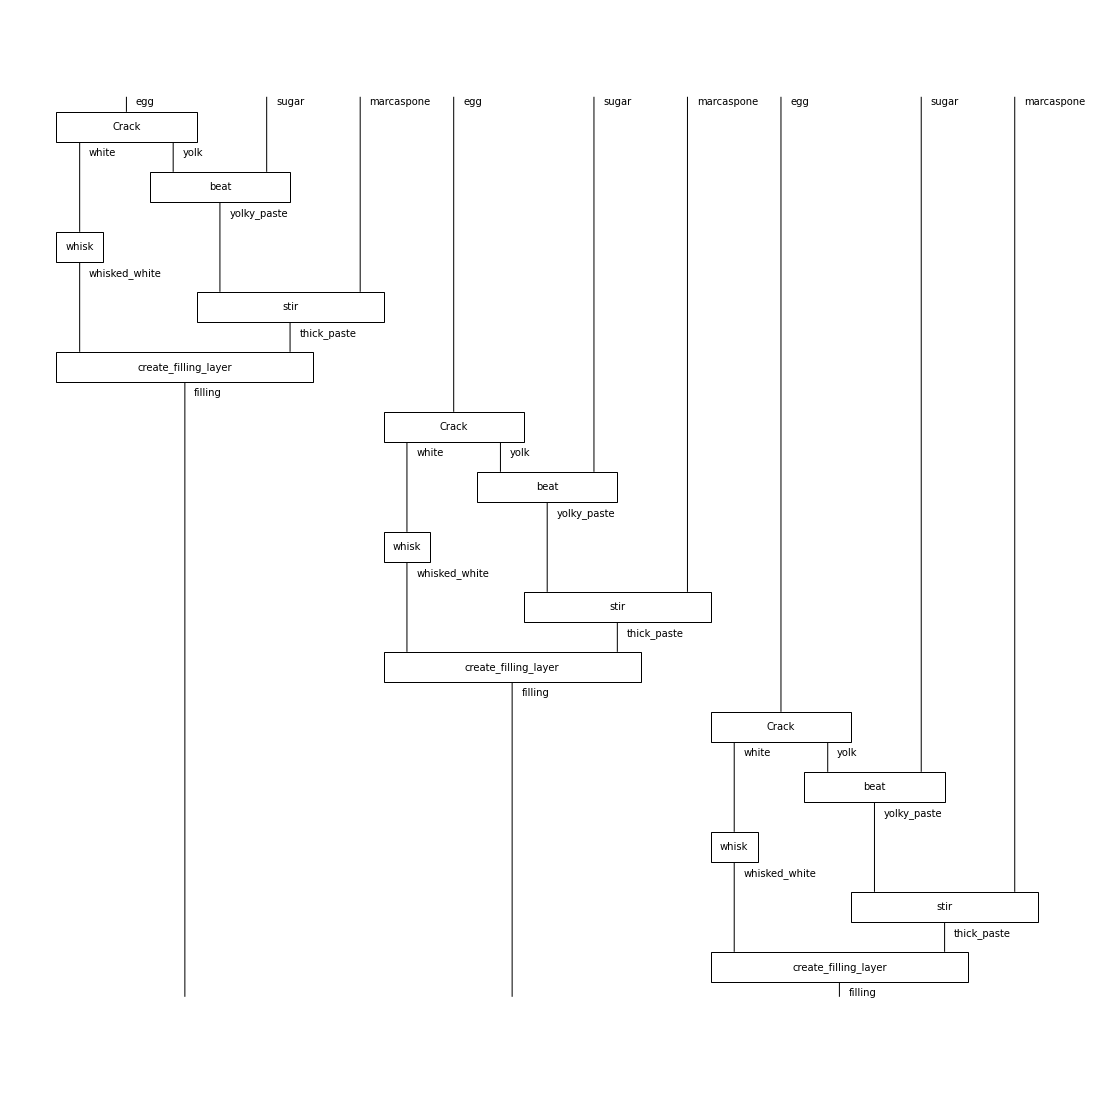

In [189]:


def get_tiramisu_layer(n):
    egg, white, yolk = Ty('egg'), Ty('white'), Ty('yolk')
    crack = Box('Crack', dom=egg, cod=white @ yolk)
    sugar, yolky_paste = Ty('sugar'), Ty('yolky_paste')
    beat = Box('beat', yolk @ sugar, yolky_paste)
    white, whisked_whites = Ty('white'), Ty('whisked_white')
    cream, thick_paste = Ty('marcaspone'), Ty('thick_paste')
    creama = Ty('filling')

    whisk = Box('whisk', white, whisked_whites)

    stir = Box('stir', yolky_paste @ cream, thick_paste)

    create_filling = Box('create_filling_layer', whisked_whites @ thick_paste, creama)


    step_1 = crack @ Id(sugar) @ Id(cream)
    step_2 = Id(white) @ beat  @ Id(cream)
    step_3 = step_1 >> step_2 
    step_4 =  step_3  >>  whisk @ Id(yolky_paste) @ Id(cream)
    step_5 = step_4 >> Id(whisked_whites) @ stir 
    step_6 = step_5 >> create_filling
    answer = step_6

    while(n-1):
        answer @= step_6
        n -= 1
    return answer

get_tiramisu_layer(3).draw(figsize=(15, 15))

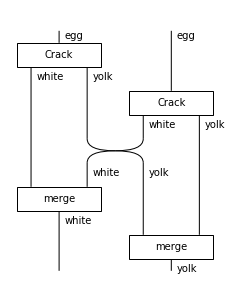

In [190]:
from discopy import Swap

merge = lambda x: Box('merge', x @ x, x)

crack_two_eggs = crack @ crack\
    >> Id(white) @ Swap(yolk, white) @ Id(yolk)\
    >> merge(white) @ merge(yolk)

crack_two_eggs.draw(figsize=(3, 4))

In [191]:
#########################

In [192]:
from discopy import Dim, Tensor

matrix = Tensor(Dim(2), Dim(2), [0, 1, 1, 0])

matrix.array

array([[0, 1],
       [1, 0]])

In [193]:
assert matrix >> Tensor.id(Dim(2)) == matrix == Tensor.id(Dim(2)) >> matrix

vector = Tensor(Dim(1), Dim(2), [0, 1])

vector >> matrix

Tensor(dom=Dim(1), cod=Dim(2), array=[1, 0])

In [194]:
assert Tensor.id(Dim(1)) @ matrix == matrix == matrix @ Tensor.id(Dim(1))

Tensor.id(Dim(1))

Tensor(dom=Dim(1), cod=Dim(1), array=[1.])

In [195]:
vector @ vector

Tensor(dom=Dim(1), cod=Dim(2, 2), array=[0, 0, 0, 1])

In [196]:
vector @ matrix

Tensor(dom=Dim(2), cod=Dim(2, 2), array=[0, 0, 0, 1, 0, 0, 1, 0])

In [197]:
import numpy as np

assert np.all(
    (matrix >> matrix).array == matrix.array.dot(matrix.array))
assert np.all(
    (matrix @ matrix).array == np.moveaxis(np.tensordot(
    matrix.array, matrix.array, 0), range(4), [0, 2, 1, 3]))

In [198]:
matrix = Tensor(Dim(2), Dim(2), [0, -1j, 1j, 0])

matrix >> matrix[::-1]

Tensor(dom=Dim(2), cod=Dim(2), array=[1.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

In [199]:
################### task 3 quantum circuits ###

In [ ]:
##############exercises for task 3######################

In [237]:
####1 bell experiment using cirq#####

import cirq 


q0 = cirq.GridQubit(0, 0) 
q1 = cirq.GridQubit(0, 1) 


circuit = cirq.Circuit() 


circuit.append(cirq.H(q0)) 
circuit.append(cirq.CX(q0,q1)) 

circuit.append(cirq.measure(q0, key='m0'))  
circuit.append(cirq.measure(q1, key='m1')) 

print("Circuit:")
print(circuit) 

shots = 
simulator = cirq.Simulator() 
result = simulator.run(circuit, repetitions=shots) 

Circuit:
(0, 0): ───H───@───M('m0')───
               │
(0, 1): ───────X───M('m1')───
Results:
m0=10110110000011001101100111111100110000001000101010111000000001011010000000110111111011010011011111111100000111001101000110100010001100011110101111100110111110000000010111011011111111100001010011101000101001111100011011111000101001100000100110100001101110001011011101000000000111001010010110011001110110101001111100011101111111100110010010010111111001101111000101110111011011011001011000111010001001111000101000011101011111000000010111110100110100011011010111100111110000110111001100101111111010001101100100110010011001001001100011111110111001011000100101111001001000100110000011010000101000111010111110001011110000001100001011100011000100111011100111111011100010011101100100110000110110110000110111100100101111001110001010011111100010000000100110101110010110101000101001111011011101011011100001110011101100111010001110001011111010001101101110000011011110110110010000001111001001110010111000011111001011

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: cirq.study.visualize.plot_state_histogram was used but is deprecated.
It will be removed in cirq v0.12.
use cirq.vis.plot_state_histogram or cirq.vis.get_state_histogram instead

  """Entry point for launching an IPython kernel.


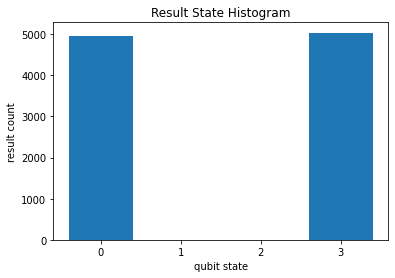

In [238]:
counts = cirq.plot_state_histogram(result)

In [239]:
print("Probabiity =", counts/shots) 

Probabiity = [0.4962 0.     0.     0.5038]


In [ ]:
#####2 circuit to create GHZ state###

In [243]:
circ = QuantumCircuit(3)


circ.h(0)
circ.cx(0, 1)
circ.cx(0, 2)


circ.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

In [ ]:
##### 3 